# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In this task, we are going to use statistical/machine learning methods to systematically understand how each factor attribute to the used car price. We incorporate statistical model to perform price factor inference, and use ML models that are easy to infer to better understanding the deeper relationship, and in the end we can predict the car price using the ML model with fine-tune hyperparameter.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [415]:
# import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [416]:
df = pd.read_csv('./data/vehicles.csv').fillna('None')
display(df)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,None,None,None,None,None,None,None,None,None,None,None,None,None,None,az
1,7218891961,fayetteville,11900,None,None,None,None,None,None,None,None,None,None,None,None,None,None,ar
2,7221797935,florida keys,21000,None,None,None,None,None,None,None,None,None,None,None,None,None,None,fl
3,7222270760,worcester / central MA,1500,None,None,None,None,None,None,None,None,None,None,None,None,None,None,ma
4,7210384030,greensboro,4900,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,None,sedan,None,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,None,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,None,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,None,diesel,4174.0,clean,other,1GYFZFR46LF088296,None,None,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,None,sedan,silver,wy


In [140]:
# Eyeball some of the model names
df['exist'] = 1
df.groupby(['manufacturer','model'])['exist'].sum()
# This looks very messy, doesn't seem to be an easy way to systematically clean them
# We will use drive, size, type to identify models

manufacturer  model                         
None          #NAME?                            31
              %                                  1
              '50 Business Coupe                 1
              '99 H1 Hummer                      1
              ,,,,,,,                            1
                                                ..
volvo         xc90 t8 inscription 1300 miles     2
              xc90 v8                            3
              xc90 v8 awd                        1
              xc90 v8 awdsuv                     1
              xc90t6 awd 24733 miles            15
Name: exist, Length: 30251, dtype: int64

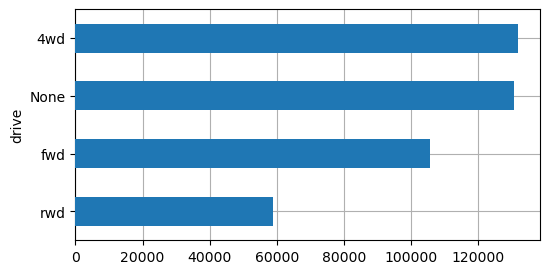

In [141]:
# Distribution of drive
df['drive'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,3),zorder=3)
plt.grid(zorder=0)

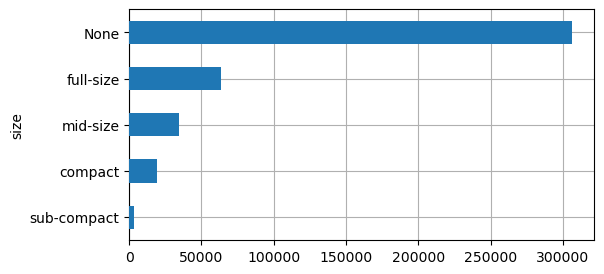

In [142]:
# Distribution of size
df['size'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,3),zorder=3)
plt.grid(zorder=0)

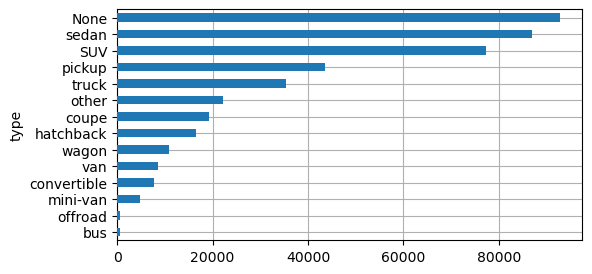

In [143]:
# Distribution of type
df['type'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,3),zorder=3)
plt.grid(zorder=0)

In [107]:
# Describe the price column
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [108]:
# Look at some high price cars
df[df.price >= 1e5].head(10)
# Some of the price is very weird (987654321 or 99999999), need to get these out.
# for simplicity, taking out anything above $1M

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,exist
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al,1
732,7311741403,birmingham,100000,1984.0,jeep,cj7,NaN,NaN,gas,112000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al,1
1727,7302443955,birmingham,130000,2019.0,chevrolet,corvette,like new,8 cylinders,gas,5000.0,clean,automatic,NaN,rwd,NaN,coupe,blue,al,1
1838,7315961634,dothan,99999999,1993.0,ford,ranger,NaN,NaN,gas,99999.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al,1
2922,7313297746,huntsville / decatur,140000,2015.0,jeep,renegade,like new,6 cylinders,gas,49658.0,rebuilt,other,NaN,fwd,mid-size,SUV,yellow,al,1
4797,7302285034,montgomery,104000,2018.0,dodge,NaN,NaN,8 cylinders,other,483.0,clean,automatic,2C3CDZH95JH100203,fwd,compact,other,NaN,al,1
4799,7302282925,montgomery,100000,2018.0,dodge,NaN,NaN,8 cylinders,other,959.0,clean,automatic,2C3CDZH98JH100129,fwd,compact,other,NaN,al,1
4826,7316436488,tuscaloosa,104900,2020.0,bmw,m805i,excellent,8 cylinders,gas,9000.0,clean,automatic,WBAGV8C04LBP48895,4wd,full-size,sedan,black,al,1
5003,7316732292,anchorage / mat-su,145000,2014.0,NaN,freightliner m2 106,like new,6 cylinders,diesel,17094.0,clean,automatic,NaN,4wd,full-size,truck,black,ak,1
6757,7308062122,anchorage / mat-su,100000,2020.0,chevrolet,corvette,new,8 cylinders,gas,5.0,clean,automatic,NaN,rwd,mid-size,NaN,orange,ak,1


In [145]:
df[df.price.between(10,100)]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,exist
96,7309361405,auburn,80,2004.0,honda,None,excellent,6 cylinders,gas,94020.0,clean,automatic,None,None,None,None,None,al,1
2345,7314338089,gadsden-anniston,35,2006.0,chevrolet,trailblazer,None,None,gas,161000.0,clean,automatic,None,None,None,None,None,al,1
4914,7307571890,tuscaloosa,24,2020.0,None,all,None,None,other,100.0,clean,other,None,None,None,None,None,al,1
5727,7313963942,anchorage / mat-su,10,2011.0,volkswagen,gti,good,4 cylinders,gas,119000.0,clean,manual,None,fwd,mid-size,hatchback,custom,ak,1
6613,7309276893,anchorage / mat-su,100,2008.0,ford,f-150,fair,None,gas,87000.0,clean,other,None,None,None,truck,None,ak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418325,7303923658,janesville,37,2019.0,None,Janesville,None,None,gas,1.0,clean,automatic,None,None,None,None,None,wi,1
418334,7303436985,janesville,37,2020.0,None,Janesville,None,None,gas,2.0,clean,automatic,None,None,None,None,None,wi,1
418344,7302978600,janesville,37,2021.0,None,Janesville,None,None,gas,1.0,clean,automatic,None,None,None,None,None,wi,1
418349,7302906315,janesville,37,2020.0,None,Janesville,None,None,gas,1.0,clean,automatic,None,None,None,None,None,wi,1


In [160]:
# Year distribution
df['year'] = df['year'].replace('None',np.nan)

<Axes: ylabel='Frequency'>

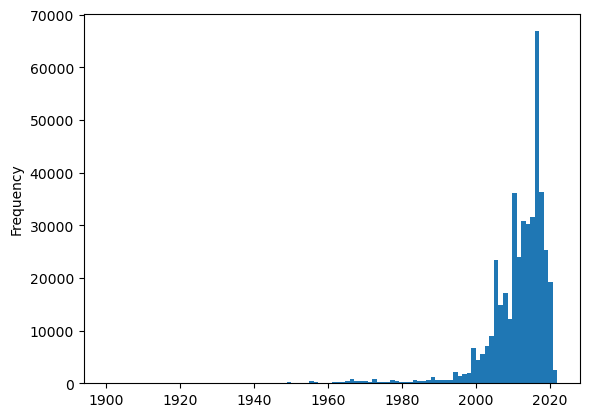

In [161]:
df['year'].plot.hist(bins=100)

In [146]:
# Will set price > 500K to NaN, and will set price < 100 to NaN
df['price'][df['price'] > 500000] = np.nan
df['price'][df['price'] < 100] = np.nan

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21760\3567229394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][df['price'] > 500000] = np.nan


In [147]:
df['price'].describe()

count    390590.000000
mean      19062.620902
std       15364.365696
min         100.000000
25%        7495.000000
50%       15500.000000
75%       27900.000000
max      470000.000000
Name: price, dtype: float64

<Axes: ylabel='Frequency'>

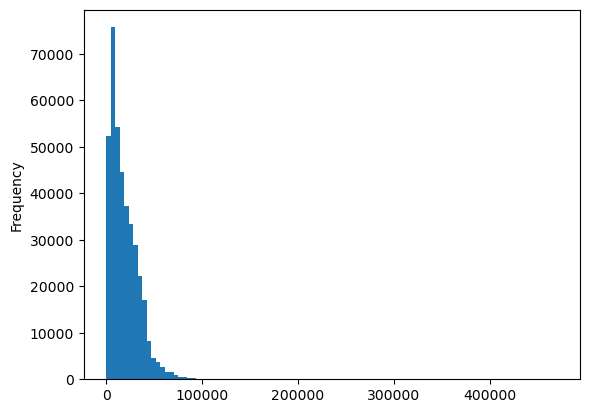

In [148]:
df['price'].plot.hist(bins=100)

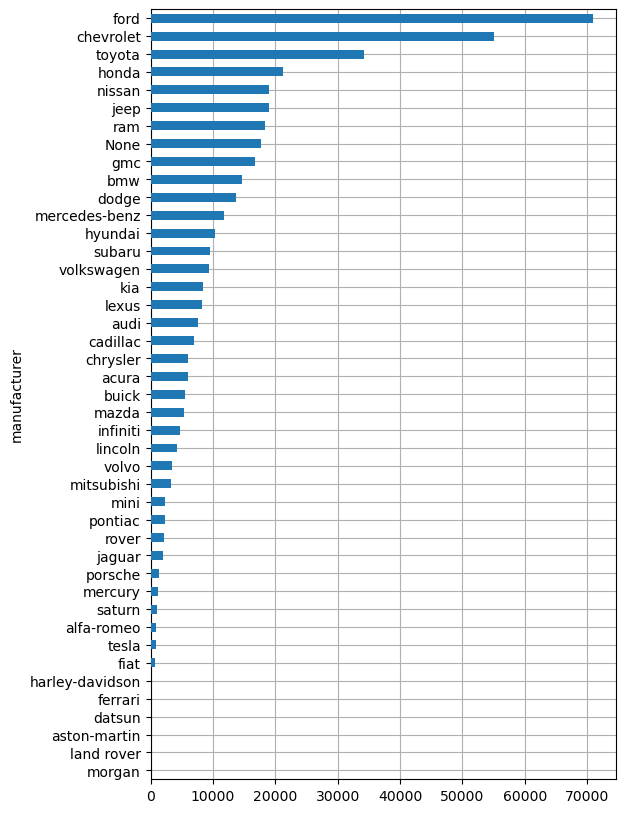

In [149]:
# manufacturer distribution
df['manufacturer'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,10),zorder=3)
plt.grid(zorder=0)

In [113]:
# Model count
len(df['model'].unique())

29650

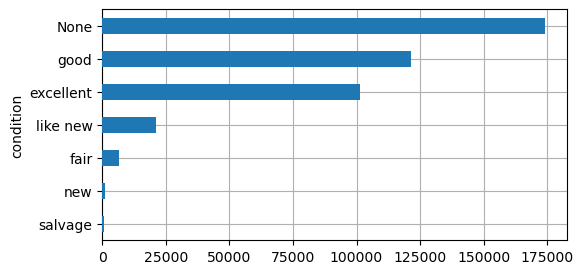

In [150]:
# Condition distribution
df['condition'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,3),zorder=3)
plt.grid(zorder=0)

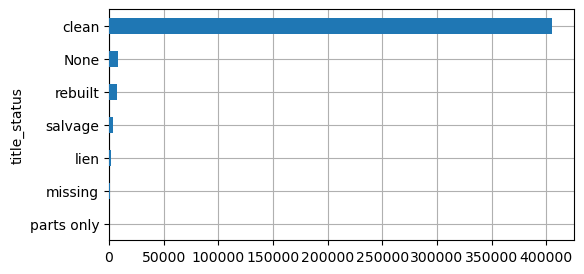

In [162]:
# Title status distribution
df['title_status'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,3),zorder=3)
plt.grid(zorder=0)

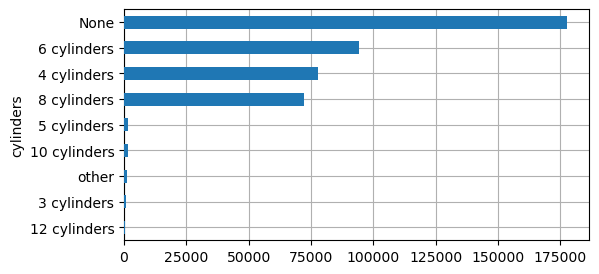

In [151]:
# Cylinders distribution
df['cylinders'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,3),zorder=3)
plt.grid(zorder=0)

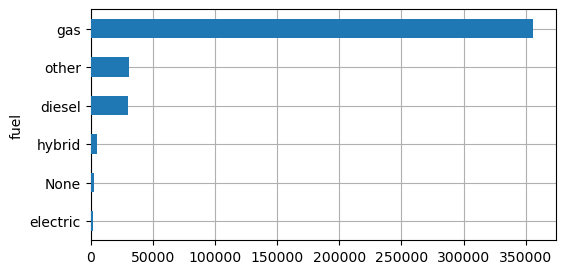

In [152]:
# Fuel distribution
df['fuel'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,3),zorder=3)
plt.grid(zorder=0)

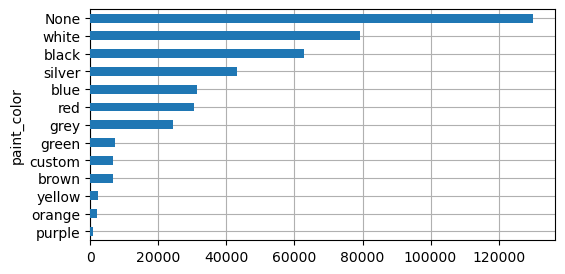

In [163]:
# Paint Color distribution
df['paint_color'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6,3),zorder=3)
plt.grid(zorder=0)

In [153]:
# Odometer Reading Distribution
df['odometer'].describe()
# Looks like odometer mas has some issue.

count     426880
unique    104871
top         None
freq        4400
Name: odometer, dtype: object

In [155]:
df['odometer'] = df['odometer'].replace('None',np.nan)

In [156]:
df[df.odometer >= 2e6]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,exist
455,7314165149,birmingham,22500.0,1929.0,ford,None,None,None,gas,9999999.0,clean,automatic,None,None,None,None,None,al,1
562,7313478091,birmingham,27990.0,2014.0,ram,2500 4x4,like new,6 cylinders,diesel,2222222.0,clean,automatic,None,4wd,full-size,truck,white,al,1
1397,7305621413,birmingham,NaN,2012.0,ram,3500 laramie 4x4,like new,6 cylinders,diesel,9999999.0,clean,automatic,None,4wd,full-size,truck,red,al,1
1398,7305617025,birmingham,NaN,2013.0,gmc,sierra 2500 hd denali 4x4,like new,8 cylinders,diesel,9999999.0,clean,automatic,None,4wd,full-size,truck,red,al,1
1399,7305615816,birmingham,NaN,2014.0,chevrolet,silverado z71 4x4,like new,8 cylinders,gas,9999999.0,clean,automatic,None,4wd,full-size,truck,white,al,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409348,7316405980,seattle-tacoma,5000.0,1978.0,volkswagen,bus,good,4 cylinders,gas,9999999.0,clean,automatic,None,None,None,None,brown,wa,1
413267,7306391116,yakima,5500.0,1958.0,chevrolet,silverado,None,None,gas,10000000.0,clean,manual,None,None,None,None,None,wa,1
419355,7311391307,la crosse,3500.0,2006.0,gmc,1500 sierra,good,8 cylinders,gas,2621720.0,clean,automatic,None,4wd,full-size,pickup,black,wi,1
419494,7306673003,la crosse,500.0,1959.0,ford,custom 300,salvage,other,gas,6090609.0,parts only,manual,None,rwd,full-size,sedan,red,wi,1


In [157]:
# For simplicity, will set any odometer reading above 500K miles to NaN
df['odometer'][df['odometer'] > 5e5] = np.nan

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21760\3565764019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['odometer'][df['odometer'] > 5e5] = np.nan


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [127]:
# Here are the columns in this DF:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'exist'],
      dtype='object')

In [128]:
# I'll be interested in the following columns: 
# price, year. manufacturer, condition, cylinders, fuel, odometer,
# title_status, transmission, drive, type, paint_color

In [206]:
df.columns = [col.replace('_','') for col in df.columns]

In [295]:
look_cols = ['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
             'titlestatus', 'transmission', 'drive', 'type', 'paintcolor']
# look_cols = ['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type']

In [296]:
df_valid = df.replace('None',np.nan).dropna(subset=look_cols)[look_cols].copy()

In [299]:
df_valid.shape

(111486, 12)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [315]:
from sklearn.linear_model import Ridge, Lasso

In [417]:
# one-hot encoding to convert categorical variable to dummy columns
df_valid_dummy = pd.get_dummies(df_valid,drop_first=True) * 1.0
display(df_valid_dummy)

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paintcolor_brown,paintcolor_custom,paintcolor_green,paintcolor_grey,paintcolor_orange,paintcolor_purple,paintcolor_red,paintcolor_silver,paintcolor_white,paintcolor_yellow
31,15000.0,2013.0,128000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,27990.0,2012.0,68696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,34590.0,2016.0,29499.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34,35000.0,2019.0,43000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35,29990.0,2016.0,17302.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590.0,2020.0,7701.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426860,39990.0,2017.0,41664.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426866,32990.0,2016.0,55612.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426874,33590.0,2018.0,30814.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [304]:
# Train Test Split to prepare for modelling
X = df_valid_dummy[[col for col in df_valid_dummy.columns if col != 'price']]
Y = df_valid_dummy['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(66891, 91)
(44595, 91)
(66891,)
(44595,)


In [332]:
# Attempt 1: Ridge Regression
# Finding the optimal alpha for Ridge regression which minimizes out-of-sample mse
for alp in [10,100,1000,10000,100000]:
    model = Ridge(alpha=alp)
    result = model.fit(X_train,y_train,)
    Y_hat = pd.Series(model.predict(X_test),index=y_test.index)
    print(np.mean(y_test - Y_hat)**2)

2307.609688488674
1777.305656805855
989.3975276975008
3.187994657069494
1514.8979862410213


In [418]:
# Using 10000 as alpha
alp = 10000
model = Ridge(alpha=alp)
result = model.fit(X_train,y_train,)
Y_hat = pd.Series(model.predict(X_test),index=y_test.index)
coef_ser = pd.Series(result.coef_,index=X.columns)

In [419]:
def analyse_dummy_coef(coefs):
    uniq_dummies = sorted(np.unique([idx.split('_')[0] for idx in coefs.index if '_' in idx]))
    
    for dummy in uniq_dummies:
        print('=============')
        print(f'{dummy} (baseline: {sorted(df_valid[dummy].unique())[0]})')
        print('=============')
        dummy_coefs = coefs.loc[[idx for idx in coefs.index if idx.startswith(dummy)]]
        print(dummy_coefs.sort_values(ascending=False))

In [420]:
analyse_dummy_coef(coef_ser)

condition (baseline: excellent)
condition_like new    460.009115
condition_new         207.514769
condition_good        120.960135
condition_salvage     -80.263134
condition_fair       -535.517870
dtype: float64
cylinders (baseline: 10 cylinders)
cylinders_8 cylinders     2990.300914
cylinders_12 cylinders      33.655547
cylinders_other            -28.738101
cylinders_3 cylinders      -84.802680
cylinders_6 cylinders      -88.872278
cylinders_5 cylinders     -162.100988
cylinders_4 cylinders    -2807.192386
dtype: float64
drive (baseline: 4wd)
drive_rwd     -97.905614
drive_fwd   -3161.944179
dtype: float64
fuel (baseline: diesel)
fuel_other         96.936862
fuel_electric       0.880052
fuel_hybrid      -224.949593
fuel_gas        -3189.937956
dtype: float64
manufacturer (baseline: acura)
manufacturer_toyota             770.348320
manufacturer_ram                760.572424
manufacturer_gmc                458.149162
manufacturer_ford               356.545629
manufacturer_porsche       

In [338]:
# OOS mse
Y_hat = pd.Series(model.predict(X_test),index=y_test.index)

print(np.mean(y_test - Y_hat)**2)

3.187994657069494

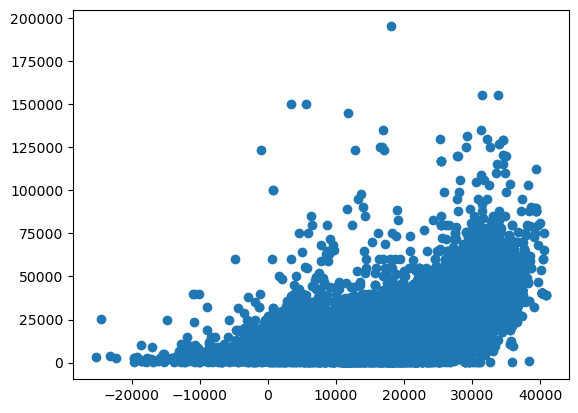

In [421]:
# Scatter plot to visually examine Ridge model efficacy
plt.scatter(Y_hat, y_test)

In [393]:
# Attempt 2: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [394]:
# Train Test Split
X_gbr = df_invalid[[col for col in df_invalid.columns if col != 'price']]
Y_gbr = df_invalid['price']
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_gbr, Y_gbr, test_size=0.4, random_state=101)
print(X_train_gbr.shape)
print(X_test_gbr.shape)
print(y_train_gbr.shape)
print(y_test_gbr.shape)

(256128, 11)
(170752, 11)
(256128,)
(170752,)


In [396]:
%%time
# Fitting the model (parameter selected manually, could be further optimized with grid-search)
gbr = GradientBoostingRegressor(learning_rate=0.1,subsample=0.2,max_depth=10,n_estimators=500)
gbr.fit(X_train,y_train,)

CPU times: total: 55.4 s
Wall time: 56.2 s


GradientBoostingRegressor(max_depth=10, n_estimators=500, subsample=0.2)

In [422]:
# OOS mse
Y_hat_gbr = pd.Series(gbr.predict(X_test),index=y_test.index)
print(np.mean(y_test - Y_hat_gbr)**2)

127.344503477524


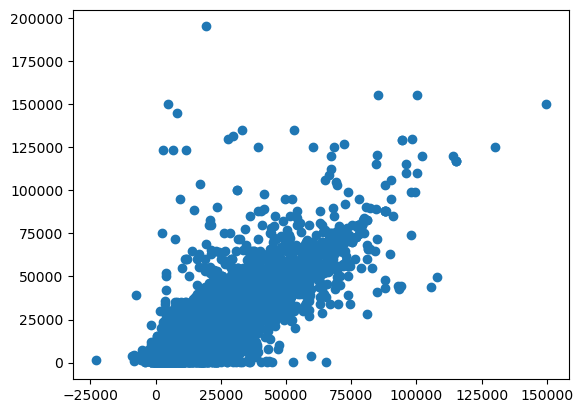

In [398]:
# Scatter plot to visually examine gradient boosting regression model efficacy
plt.scatter(Y_hat_gbr, y_test)

<Axes: >

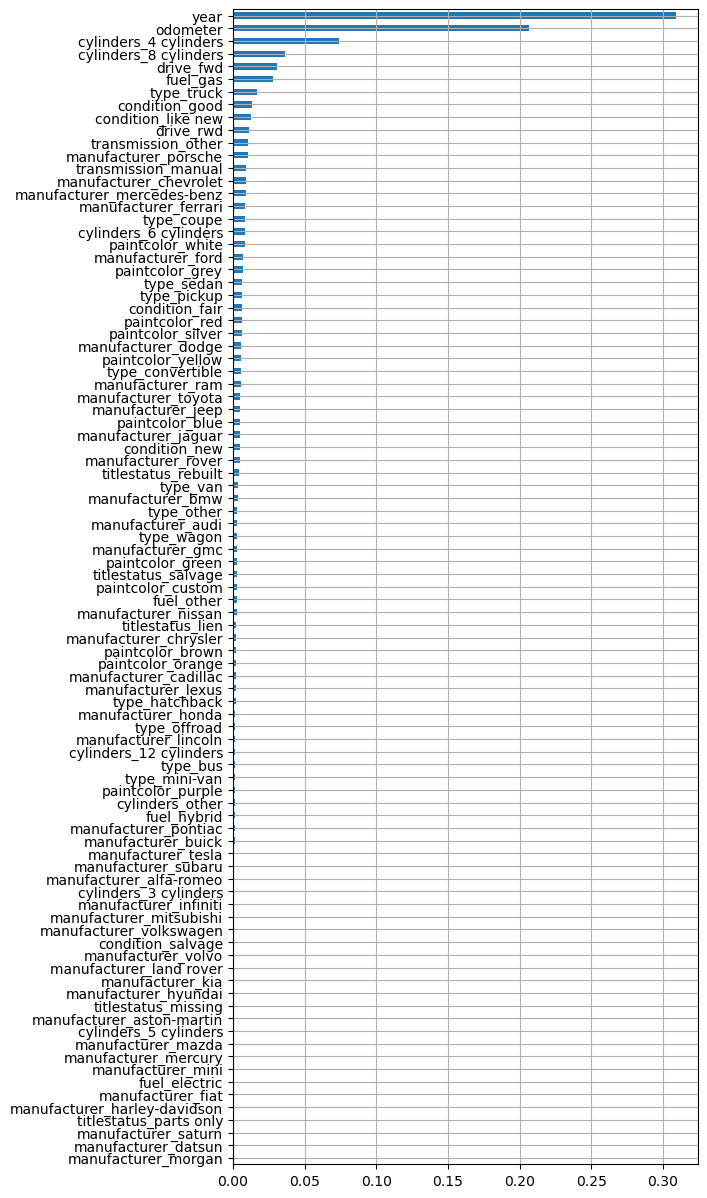

In [423]:
# Plot feature importance of the gradient boosting model
feat_importance = pd.Series(gbr.feature_importances_,index=X_train.columns).sort_values()
feat_importance.plot.barh(figsize=(6,15),grid=True)

In [405]:
# Import Shap
pip install shap
import shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/a3/89/f5cca6e299320e19194ad09f6014db33208a49e8d9161e729725eb17f8a8/shap-0.44.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   --------------------------------------- 450.3/450.3 kB 14.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [410]:
# Fit X_train into Shap to understand the relationship
explainer = shap.Explainer(gbr, X_train)
shap_values = explainer(X_train)

100%|===================| 66853/66891 [24:55<00:00]        

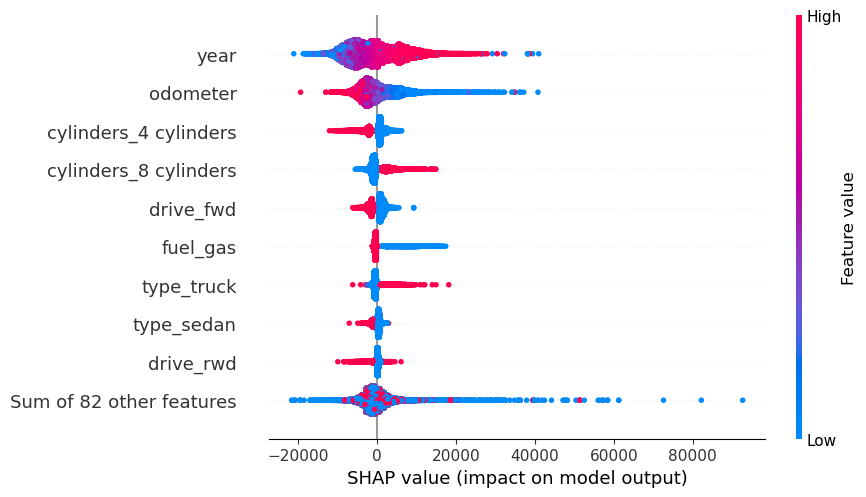

In [411]:
shap.plots.beeswarm(shap_values)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [412]:
analyse_dummy_coef(coef_ser)

condition (baseline: excellent)
condition_like new    460.009115
condition_new         207.514769
condition_good        120.960135
condition_salvage     -80.263134
condition_fair       -535.517870
dtype: float64
cylinders (baseline: 10 cylinders)
cylinders_8 cylinders     2990.300914
cylinders_12 cylinders      33.655547
cylinders_other            -28.738101
cylinders_3 cylinders      -84.802680
cylinders_6 cylinders      -88.872278
cylinders_5 cylinders     -162.100988
cylinders_4 cylinders    -2807.192386
dtype: float64
drive (baseline: 4wd)
drive_rwd     -97.905614
drive_fwd   -3161.944179
dtype: float64
fuel (baseline: diesel)
fuel_other         96.936862
fuel_electric       0.880052
fuel_hybrid      -224.949593
fuel_gas        -3189.937956
dtype: float64
manufacturer (baseline: acura)
manufacturer_toyota             770.348320
manufacturer_ram                760.572424
manufacturer_gmc                458.149162
manufacturer_ford               356.545629
manufacturer_porsche       

In [413]:
coef_ser

year                         325.426021
odometer                      -0.099920
manufacturer_alfa-romeo        9.319266
manufacturer_aston-martin      7.354445
manufacturer_audi             31.160679
                                ...    
paintcolor_purple              2.833354
paintcolor_red                30.804579
paintcolor_silver           -566.270890
paintcolor_white             659.256569
paintcolor_yellow             83.325237
Length: 91, dtype: float64

From the linear model coefficients we can see that:

1. year and odometer readings are the two biggest factor. If a car is 1 year older and everything else is held constant, its value will go down by 325.43 dollars. If a car has 1000 more miles on the odometer and everything else is constant, its value will got down 99.92 dollars. 

2. customers do value cars with more cylinders. A 8 cylinder car on average is roughly 5700 dollars more than 4 cylinder cars

3. Customers do value white cars more than black cars, and people don't like silver, blue or grey

4. The condition of the car is also very important, and the relationship between condition and price is very monotonic.

5. Clean title cars are more valuable than salvage and re-build title cars

6. The brand of the car does not matter that much, but its maybe because of the Ridge regression which penalizes the betas. If we use OLS, we might see some huge coefficients coming from luxury brands like Ferrari or Lamborghini

From thhe gradient boosting regression model, we can evaluate the model from 2 perspectives:

1. Feature importance. We can see that year and odometer are still the 2 most important features that determines the price oft the car. Features like cylinder number, fwd drive, gas fuel, truck, conditions are also on the top of the list. However, feature importance does not tell us the direction of the feature. So we need to use other tools like partial dependent plot, or Shapley value, to determine the direction of features on price. Here I use Shapley value.

2. From the Shapley value we can see that, year affect price positively (red on the right and blue on the left), meaning a larger year number (more recent) will lead to higher car price. Odometer affect price negatively (red on the left and blue on the right), meaning a larger odometer will lead to lower car price. 4 cylinders and 8 cylinders also have opposite direction, which means people value 8-cylinder more than non-8-cylinder cars, and people value non-4-cylinder cars more than 4-cylinder cars. Which all agree with linear model

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Based on the above analysis, we can see that:
1. people value newer cars more than old cars
2. people value cars with less mileage
3. people value white cars and dislike blue/grey/silver
4. people value cars with bigger engine (more cylinders)
5. people generally love trucks

When we prepare inventory, if we want to sell higher price, we should fine tune our inventory towards these metrics. 